By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/07/19

Videos:
* [[10分鐘搞懂機器學習] 3.6 模型太過簡單還是太過複雜? 學習曲線的判讀 Learning curves Overfitting vs. Underfitting](https://youtu.be/J-s_i8yjtMU?si=9vgYRoybw7gkFbA5)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


學習曲線 Learning Curves

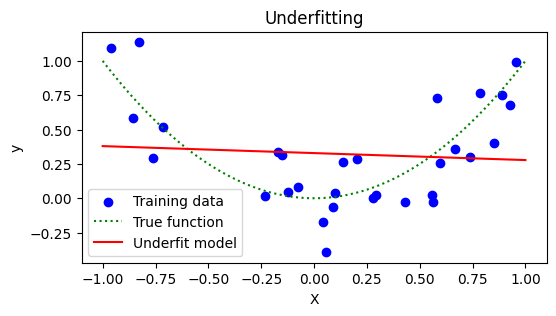

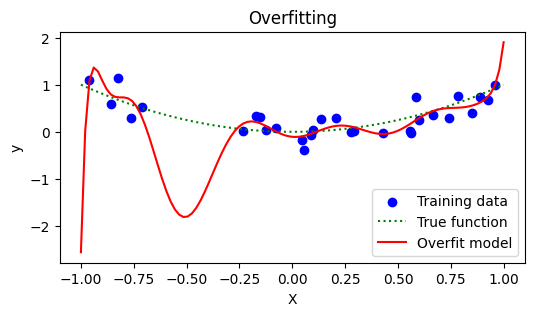

In [ ]:
# Prompt: Python code: 兩張圖 ，針對回歸問題(同一筆訓練集，使用二次函數生成)，繪製 underfitting和overfitting的情況
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 生成數據
np.random.seed(0)
X = np.sort(np.random.rand(30) * 2 - 1)
y = X**2 + 0.2 * np.random.randn(30)

# 創建真實的二次函數
X_test = np.linspace(-1, 1, 100)
y_test = X_test**2

# 欠擬合模型（線性回歸）
underfit_model = LinearRegression()
underfit_model.fit(X.reshape(-1, 1), y)
y_underfit = underfit_model.predict(X_test.reshape(-1, 1))

# 過擬合模型（多項式回歸）
poly_degree=13
overfit_model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
overfit_model.fit(X.reshape(-1, 1), y)
y_overfit = overfit_model.predict(X_test.reshape(-1, 1))

# 繪製欠擬合圖
plt.figure(figsize=(6, 3))
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X_test, y_test, color='green', linestyle=':', label='True function')
plt.plot(X_test, y_underfit, color='red', label='Underfit model')
plt.title('Underfitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 繪製過擬合圖
plt.figure(figsize=(6, 3))
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X_test, y_test, color='green', linestyle=':', label='True function')
plt.plot(X_test, y_overfit, color='red', label='Overfit model')
plt.title('Overfitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

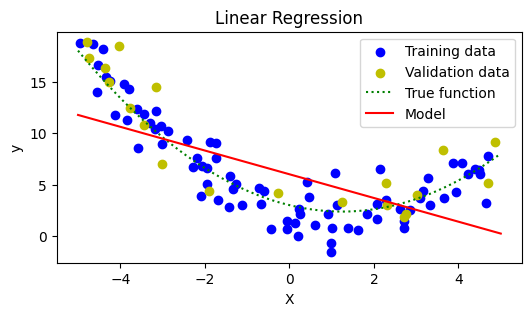

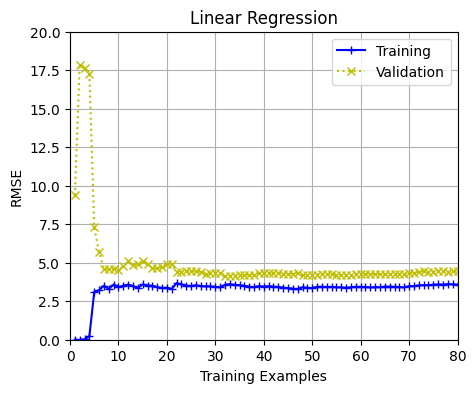

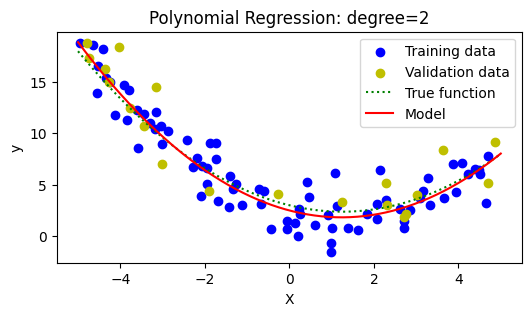

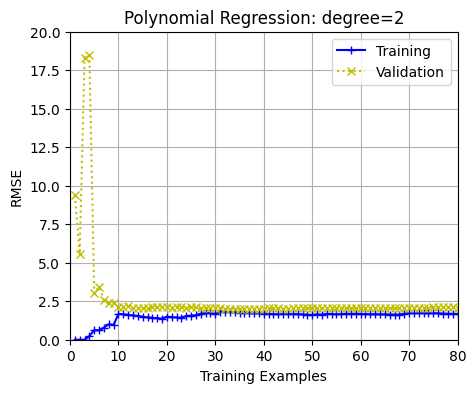

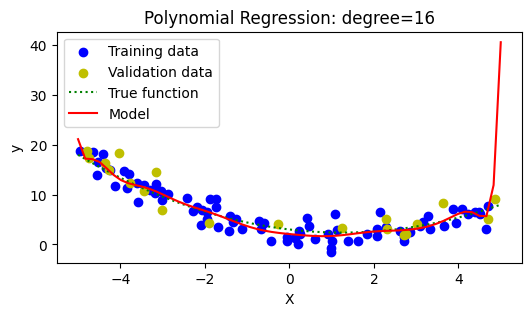

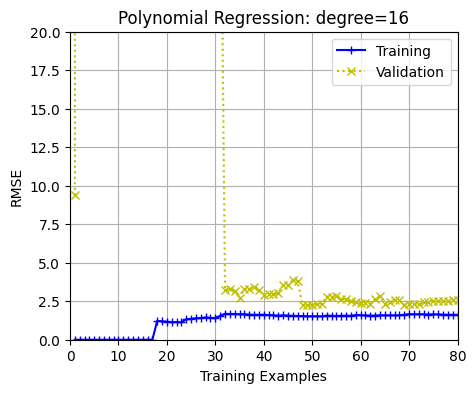

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 10 * np.random.rand(m, 1) - 5
y = 0.4 * X**2 -  X + 3 + 2*np.random.randn(m, 1)

# 創建真實的二次函數
X_true = np.linspace(-5, 5, 60)
y_true = 0.4 * X_true**2 -  X_true + 3

# 分割數據為訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

def calculate_rmse(model, X, y):
    y_pred = model.predict(X.reshape(-1, 1))
    return np.sqrt(mean_squared_error(y, y_pred))

def plot_model_data(model, X_train, y_train, X_val, y_val, X_true, y_true, title):
    model.fit(X_train.reshape(-1, 1), y_train)
    y_hat = model.predict(X_true.reshape(-1, 1))
    plt.figure(figsize=(6, 3))
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_val, y_val, color='y', label='Validation data')
    plt.plot(X_true, y_true, color='green', linestyle=':', label='True function')
    plt.plot(X_true, y_hat, color='red', label='Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.show()


def plot_learning_curve(model, X_train, y_train, X_val, y_val, title):
    train_rmse = []
    val_rmse = []

    for n_samples in range(1,len(X_train)+1):
        model.fit(X_train[:n_samples].reshape(-1, 1), y_train[:n_samples])
        train_rmse.append(calculate_rmse(model, X_train[:n_samples], y_train[:n_samples]))
        val_rmse.append(calculate_rmse(model, X_val, y_val))

    plt.figure(figsize=(5, 4))
    x = np.arange(1, len(train_rmse) + 1)
    plt.plot(x, train_rmse, '+-', color='b', label='Training')
    plt.plot(x, val_rmse, 'x:', color='y', label='Validation')
    plt.xlabel('Training Examples')
    plt.ylabel('RMSE')
    plt.title(title)
    plt.legend()
    plt.axis([0, 80, 0, 20])
    plt.grid(True)
    plt.show()

# 線性回歸模型
model = LinearRegression()
title = 'Linear Regression'
plot_model_data(model, X_train, y_train, X_val, y_val, X_true, y_true, title)
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)

# 多項式回歸模型
poly_n=2
title = 'Polynomial Regression: degree='+str(poly_n)
model = make_pipeline(PolynomialFeatures(degree=poly_n), LinearRegression())
plot_model_data(model, X_train, y_train, X_val, y_val, X_true, y_true, title)
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)


# 多項式回歸模型
poly_n=16
title = 'Polynomial Regression: degree='+str(poly_n)
model = make_pipeline(PolynomialFeatures(degree=poly_n), LinearRegression())
plot_model_data(model, X_train, y_train, X_val, y_val, X_true, y_true, title)
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)

# model.fit(X_train.reshape(-1, 1), y_train)
# y_hat = model.predict(X_true.reshape(-1, 1))
# plt.figure(figsize=(6, 3))
# plt.scatter(X_train, y_train, color='blue', label='Training data')
# plt.scatter(X_val, y_val, color='yellow', label='Validation data')
# plt.plot(X_true, y_true, color='green', linestyle=':', label='True function')
# plt.plot(X_true, y_hat, color='red', label='Model')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.axis([-5, 2, -5, 25])
# plt.show()

# plot_learning_curve(model, X_train, y_train, X_val, y_val, 'Polynomial Regression: degree='+str(poly_n))







學習曲線範例

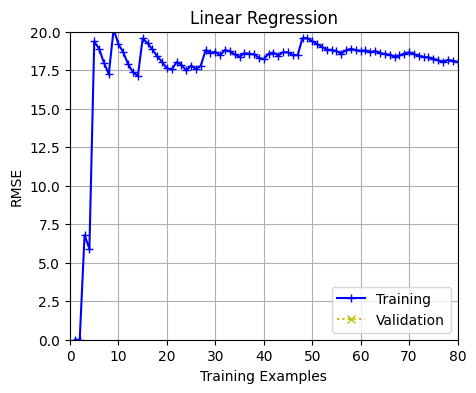

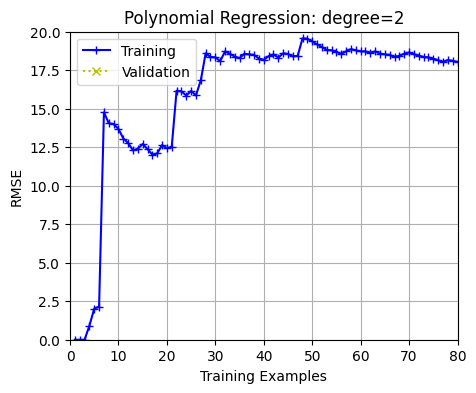

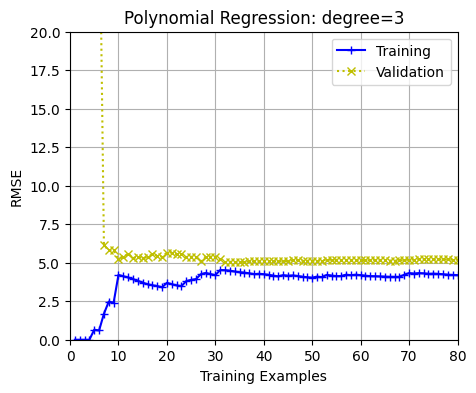

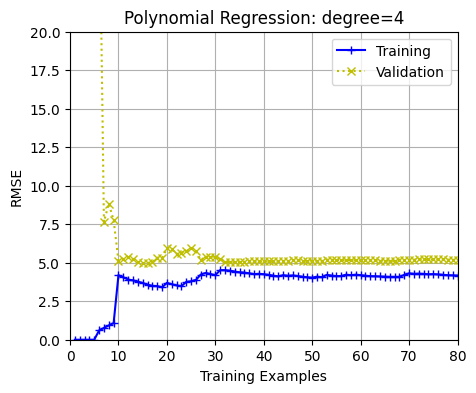

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 10 * np.random.rand(m, 1) - 5
y =  X**3 + 5*np.random.randn(m, 1)



# 分割數據為訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

def calculate_rmse(model, X, y):
    y_pred = model.predict(X.reshape(-1, 1))
    return np.sqrt(mean_squared_error(y, y_pred))

def plot_learning_curve(model, X_train, y_train, X_val, y_val, title):
    train_rmse = []
    val_rmse = []

    for n_samples in range(1,len(X_train)+1):
        model.fit(X_train[:n_samples].reshape(-1, 1), y_train[:n_samples])
        train_rmse.append(calculate_rmse(model, X_train[:n_samples], y_train[:n_samples]))
        val_rmse.append(calculate_rmse(model, X_val, y_val))

    plt.figure(figsize=(5, 4))
    x = np.arange(1, len(train_rmse) + 1)
    plt.plot(x, train_rmse, '+-', color='b', label='Training')
    plt.plot(x, val_rmse, 'x:', color='y', label='Validation')
    plt.xlabel('Training Examples')
    plt.ylabel('RMSE')
    plt.title(title)
    plt.legend()
    # plt.axis([0, 80, 0, 20]) #暫態觀察過度擬合
    plt.grid(True)
    plt.show()

# 線性回歸模型
model = LinearRegression()
title = 'Linear Regression'
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)

# 多項式回歸模型
poly_n=2
title = 'Polynomial Regression: degree='+str(poly_n)
model = make_pipeline(PolynomialFeatures(degree=poly_n), LinearRegression())
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)


# 多項式回歸模型
poly_n=3
title = 'Polynomial Regression: degree='+str(poly_n)
model = make_pipeline(PolynomialFeatures(degree=poly_n), LinearRegression())
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)


# 多項式回歸模型
poly_n=4
title = 'Polynomial Regression: degree='+str(poly_n)
model = make_pipeline(PolynomialFeatures(degree=poly_n), LinearRegression())
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)

# 多項式回歸模型
poly_n=15
title = 'Polynomial Regression: degree='+str(poly_n)
model = make_pipeline(PolynomialFeatures(degree=poly_n), LinearRegression())
plot_learning_curve(model, X_train, y_train, X_val, y_val, title)



